In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from datetime import datetime
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")


# Variables for DataFrame
media_sources = []
text = []
date = []
tweets_ago = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []  
neutral_list = []

# Tweet Counter
counter = 1

# Loop through each user
for user in target_user:
    
    # Tweet counter per target user
    tweet_count = 0
    
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1,6):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
        

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Add to target Tweet count
            tweet_count += 1

            
            # Print Tweets
            print(f"Tweet {counter}: {tweet['text']}")
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"] 
                  
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            media_sources.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)      
            
            
            # Add to counter
            counter += 1 


Tweet 1: Prince Harry and Meghan arrive in the Republic of Ireland https://t.co/gjRjoWzI9V
Tweet 2: RT @BBCSport: France have booked their place in the #WorldCup final, where they'll meet either Croatia or England.

#FRABEL report: https:/…
Tweet 3: RT @BBCSport: FT: #FRA 1-0 #BEL 

France are into their third #WorldCup final! 

Samuel Umtiti's 51st minute header gives Les Bleus victory…
Tweet 4: Cave rescue: The divers who got the Thai boys out https://t.co/iVJlhirMXe
Tweet 5: US mum and daughter 'questioned over different surnames' https://t.co/qbOFzai5sA
Tweet 6: RT @BBCNews: By measuring stress and anxiety levels, this wristband could help people manage severe autism

https://t.co/qkrzW7TnSw https:/…
Tweet 7: RT @BBCSport: GOAL: #FRA 1-0 #BEL 

Samuel Umtiti with the header! The defender gets up above Fellaini from a corner.

📺 @BBCOne 
#FRABEL #…
Tweet 8: No hopscotch, no hockey: Canada neighbourhood bans outside fun https://t.co/ZFvTItfrKs
Tweet 9: RT @BBCNewsbeat: Why WAS Elon M

Tweet 81: Harvey Weinstein pleads not guilty in third sex assault case https://t.co/XtBOL42ckP
Tweet 82: California man proposes after finding rings in ashes of home https://t.co/rWWjSKBFBI
Tweet 83: RT @richard_conway: I understand FIFA remains in contact with the Thai FA over the football team boys trapped in the partly flooded cave (8…
Tweet 84: RT @BBC_HaveYourSay: .@chrissyteigen photo with 'twins' creates social media storm on #breastfeeding

https://t.co/9wQGRpd0H1
Tweet 85: RT @pakhead: So we can confirm 4 boys out, chilled but safe today, 4 boys yesterday. 8 our of 8 - superb work. They will go back for the re…
Tweet 86: RT @BBCBreaking: #ThaiCaveRescue: Four more boys have been safely taken out of the caves, bringing the total rescued to eight, the BBC unde…
Tweet 87: “I want to tell you honey you are the hero in my heart”

Saman Gunan's wife and father tell us about the man who di… https://t.co/PSj0vLctkS
Tweet 88: RT @bbcaaron: Another scandal is brewing in the car industry

Tweet 141: NEW: All twelve boys and their soccer coach are out of the cave in Thailand that they were trapped in for more than… https://t.co/De8C3QmUp8
Tweet 142: RT @CBSThisMorning: Now on CBS: @SenSchumer reacts to the announcement of Brett Kavanaugh nominated to the Supreme Court. https://t.co/38Wn…
Tweet 143: Commentary: The real reason conservatives will bet big on Brett Kavanaugh https://t.co/e3W1YrNy9c https://t.co/j4qlmrWocf
Tweet 144: Los Angeles authorities are searching for several suspects in the beating of a 92-year-old man out for a walk on th… https://t.co/CfoQUSs3oJ
Tweet 145: RT @CBSThisMorning: Ahead on @CBSThisMorning: @SenSchumer will join us for his first interview following the announcement of Brett Kavanaug…
Tweet 146: RT @CBSThisMorning: Here's a look at what's ahead on @CBSThisMorning. Join us at 7 a.m. for the latest on #ThaiCaveResue. https://t.co/ZY7W…
Tweet 147: "I looked back and it was like a war scene": Survivor speaks out after multi-car crash kills man

Tweet 221: Serena Williams rallies to reach Wimbledon semifinals https://t.co/WkBT8PeKdt https://t.co/10jtgrHe3L
Tweet 222: Electric scooters have overtaken the streets in several cities around the world. Now lawmakers are struggling to re… https://t.co/0VwWw6xb8M
Tweet 223: Brits are changing their tune on immigrant workers https://t.co/szJ4RwqYAr https://t.co/t1i78uHXra
Tweet 224: Wildlife rangers in northern Australia captured this massive 1,300 pound crocodile after first spotting it nearly a… https://t.co/ssI3PPSsAO
Tweet 225: This Kenyan coffee farmer uses cow manure to power her biogas stove https://t.co/NalTvfynFd https://t.co/e9K4Sh3k12
Tweet 226: Now that 12 boys and their coach have been freed from a cave in Thailand, doctors are monitoring their health, look… https://t.co/d9lTmFtbu4
Tweet 227: A charter jet crashed in the South African capital of Pretoria on Tuesday afternoon, leaving about 20 people injure… https://t.co/x4z1Wo2n9B
Tweet 228: After nine years, 16 trophies a

Tweet 281: A recent study found that humans on the moon increased its temperature. Here's why: https://t.co/PdagTRQmin https://t.co/AmoQwTPa0d
Tweet 282: She found her ring in the ashes of their home, so he proposed all over again https://t.co/0axkibJEPg https://t.co/Yvny48JnCD
Tweet 283: Electric scooters have overtaken the streets in several cities around the world. Now lawmakers are struggling to re… https://t.co/pfI5ltM0Eo
Tweet 284: A planned project in Dubai that's being billed as the world's largest vertical farm will soon feed the Middle East'… https://t.co/eOEjmWZi7g
Tweet 285: Starbucks is going strawless. The coffee company announced Monday that it will phase out plastic straws from all of… https://t.co/m3cbMiBf2S
Tweet 286: A Florida man had a heart attack while laying sod in his front yard to avoid getting a fine from his homeowner's as… https://t.co/Sy8W3CJv78
Tweet 287: Chicago has been Sears' headquarters for a century. Now, the struggling retailer is closing its last l

Tweet 361: Thai cave rescue timeline: The dangerous race to bring trapped soccer team home https://t.co/SfG2adTaV9
Tweet 362: Guatemalan national pays $280 fine for negligent driving in crash that killed FBI agent, fire marshal (via… https://t.co/7MW2rUhNBI
Tweet 363: Trump says Putin summit could be 'easiest' stop of European tour, amid NATO tensions (via @brookefoxnews) https://t.co/Qe9GiZ1ooH
Tweet 364: .@MarcusLuttrell: “Where they were at supersedes anything I had ever seen.” https://t.co/gBnx7VSWlo
Tweet 365: Entire Thai soccer team, coach freed from cave after daring rescue, Navy says; @Jeff_Journalist reports… https://t.co/wGndG0Ltb7
Tweet 366: .@EricTrump: “Why is it that we have to be the piggy-bank for the entire world?” https://t.co/UGMHqjQpEe
Tweet 367: .@POTUS: “I think that getting along with Russia, getting along with China, getting along with others is a good thi… https://t.co/VGie3gq502
Tweet 368: .@POTUS: “We’re being taken advantage of by the European Union.” https:

Tweet 441: Starbucks will stop using disposable plastic straws by 2020, eliminating more than one billion straws a year, the r… https://t.co/SxYplF56MF
Tweet 442: McKinsey has ended a lucrative consulting contract with ICE. A Times report about the firm’s work prompted question… https://t.co/M4qVD7toMB
Tweet 443: President Trump nominated Judge Brett Kavanaugh for the Supreme Court. Here’s what happens next and what you can ex… https://t.co/9C8xFAkupT
Tweet 444: RT @nytimesphoto: Photos that show the routes of the Underground Railroad https://t.co/bQ8eUGErvd https://t.co/7iYhbLKEky
Tweet 445: Will Kavanaugh Provide Cover for Trump? https://t.co/TcRBaAWomZ
Tweet 446: Think about making a double batch of this hummus. It goes quickly. https://t.co/fLqYR7sL59
Tweet 447: Nearly 6 Months on the Job, the Subway Chief Is Set to Finally Meet the Mayor https://t.co/qxY0xhDhc1
Tweet 448: ‘No Poach’ Deals for Fast-Food Workers Face Scrutiny by States https://t.co/sSO1z0STlB
Tweet 449: In Opinion,


In [3]:
# Convert sentiments to a DataFrame
sentiments_df = pd.DataFrame({ "Media":media_sources,
                           "Tweet":text,
                            "Date":date,
                            "Compound Score":compound_list,
                            "Positive Score": positive_list,
                            "Neutral Score": neutral_list,
                            "Negative Score":negative_list,
                            "Tweets Ago": tweets_ago})


In [ ]:
# Rearrange columns of DataFrame 
sentiments_df = sentiments_df[["Media","Date","Tweet","Compound Score","Positive Score",
                               "Negative Score","Neutral Score", "Tweets Ago"]]

sentiments_df.head()


In [5]:
sentiments_df.to_csv("Output/Sentiments_Analysis_Data.csv")

In [ ]:
# Check Dataframe output for constitency or errors
sentiments_df.info()

In [7]:
# Subset DataFrame by each Media Source 
bbc = sentiments_df.loc[sentiments_df["Media"] == "@BBCWorld"]
cbs = sentiments_df.loc[sentiments_df["Media"] == "@CBSNews"]
cnn = sentiments_df.loc[sentiments_df["Media"] == "@CNN"]
fox = sentiments_df.loc[sentiments_df["Media"] == "@FoxNews"]
nyt = sentiments_df.loc[sentiments_df["Media"] == "@nytimes"]

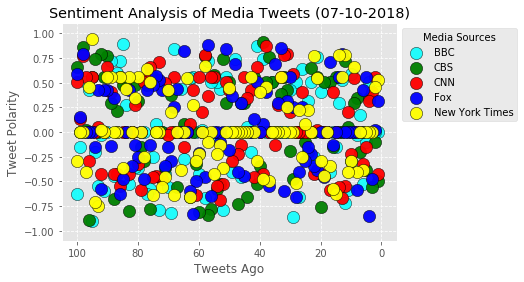

In [9]:
# Create scatter plots
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='cyan',edgecolor='k', s=150, alpha=.95, label='BBC')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='green',edgecolor='k', s=150, alpha=0.95, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='red',edgecolor='k' , s=150, alpha=0.95, label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='blue',edgecolor='k', s=150, alpha=0.95, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='yellow',edgecolor='k', s=150, alpha=0.95, label='New York Times')


# Incorporate other Plot features
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.title(f"Sentiment Analysis of Media Tweets ({now})") 
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 1), title='Media Sources')
plt.grid(True, ls='dashed')


# Save file to Output folder
plt.savefig("Output/Sentiment Analysis of Media Tweets.png")

plt.show()


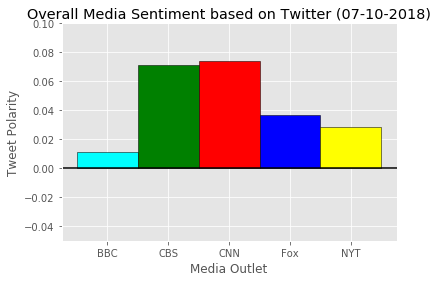

In [12]:

# Create a bar chart
plt.bar(0, bbc['Compound Score'].mean(), edgecolor = 'black', color='cyan', width=1)
plt.bar(1, cbs['Compound Score'].mean(), edgecolor = 'black', color='green', width=1)
plt.bar(2, cnn['Compound Score'].mean(), edgecolor = 'black', color='red', width=1)
plt.bar(3, fox['Compound Score'].mean(), edgecolor = 'black', color='blue', width=1)
plt.bar(4, nyt['Compound Score'].mean(), edgecolor = 'black', color='yellow', width=1)


# Incorporate other plot features
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylim(-0.05, 0.10)
plt.xlabel("Media Outlet")
plt.ylabel("Tweet Polarity")
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)
plt.axhline(y=0, color='k') #Adds a horizontal line at zero
plt.grid(True)

# Save file to Output folder
plt.savefig("Output/Overall Sentiment Analysis of Media Tweets.png")

plt.show()




# News Mood Analysis:




1. From the scatter plot, it is quite challenging to visually analyze and draw conclusions on how generally positive or negative the sentiments being tweeted out by the various media houses are. Most data points on the scatter plot seem to fall within the range -0.75 and +0.75. Which seems to suggest that tweets can be overly postive, negative or anywhere in between. Furthermore, from the plot, we can see that the most positive tweet is from the New York Times and the title for the most negative tweet is shared by both CBS and BBC. It can also be garnered from the plot that there are quite a lot of tweets with a compound score of zero and thus senitments of neutral intensity. 


2. Using a bar plot and aggregating compound mean scores for each media outlet, presents a better means of analyzing sentiments. Using the rule that anything below a score of -0.05 is tagged negative and anything above 0.05, is a positive. And anything in between being neutral. We can easily discern that tweets from BBC, Fox News and the New York Times are on the average, neutral in their sentiments. On the other hand tweets from the other media outlets, nameley CBS and CNN, are for the most part leaning to the positive with the intensity of their sentiments.


3. It is equally important to understand and appreciate that the analysis above were executed at a specific time and day. As Tweets from media outlets depend on current news events, to effectively and accurately analyze the overall sentiments of a media outlet's tweets will require much more than a onetime effort. In other words, it will be prudent to run sentiment analysis over a longer period of time - say a month, or a quarter, even a year - to be able to effectivley judge the nature of the media outlet's sentiments. To buttress this assertion, at the time of running the sentiment analysis above, a casual look at all the media outlets under review revealed that the major news event of the day was the successful rescue of 12 young footballers and their coach from a submerged cave in Thailand. It is safe to assume that huge focus on this single major news event and the multiple postive sentiments stemming from it could explain the overall positive or neutral compound score for each media outlet analyzed.  